## 一、算法介绍

**AdaBoost（Adaptive Boosting）** 是一种集成学习方法，它通过迭代地训练弱分类器并将它们组合成一个强分类器来提高模型的性能。AdaBoost的核心思想是每次迭代中赋予错误分类样本更高的权重，从而使得后续的弱分类器更加关注这些难分类的样本。AdaBoost可以应用于分类问题，尤其是二分类问题。

## 二、算法原理

### 2.1 基本概念
AdaBoost通过迭代地训练多个弱分类器（通常是决策树），并根据每个分类器的性能为其分配权重。最终的强分类器是所有弱分类器的加权投票结果。

### 2.2 权重更新
在每一轮迭代中，假设我们有一个弱分类器$h_t(x)$，其分类误差为$\epsilon_t$。则该分类器的权重$\alpha_t$可以通过以下公式计算：
$$\alpha_t = \frac{1}{2} \ln \left( \frac{1 - \epsilon_t}{\epsilon_t} \right)$$

样本权重$w_i$也会根据分类结果进行更新：
$$w_i^{(t+1)} = w_i^{(t)} \exp(\alpha_t \cdot I(y_i \neq h_t(x_i)))$$
其中$I(y_i \neq h_t(x_i))$是一个指示函数，如果样本$i$被正确分类，则值为0，否则为1。

### 2.3 最终模型
最终的强分类器$H(x)$是所有弱分类器的加权和：
$$H(x) = \text{sign} \left( \sum_{t=1}^T \alpha_t h_t(x) \right)$$

## 数据集介绍

本次案例分析使用的数据集包含了一系列工业机器的运行状态记录，包括机器编号、质量等级、工厂温度、机器温度、转速、扭矩、使用时长等特征，以及是否发生故障的标签。我们的任务是基于这些特征预测机器是否会故障。


## 三、案例分析

### 3.1数据集介绍

本次案例分析使用的数据集包含了一系列工业机器的运行状态记录，包括机器编号、质量等级、工厂温度、机器温度、转速、扭矩、使用时长等特征，以及是否发生故障的标签。我们的任务是基于这些特征预测机器是否会故障。

d:\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2624
           1       0.51      0.37      0.43        76

    accuracy                           0.97      2700
   macro avg       0.75      0.68      0.71      2700
weighted avg       0.97      0.97      0.97      2700



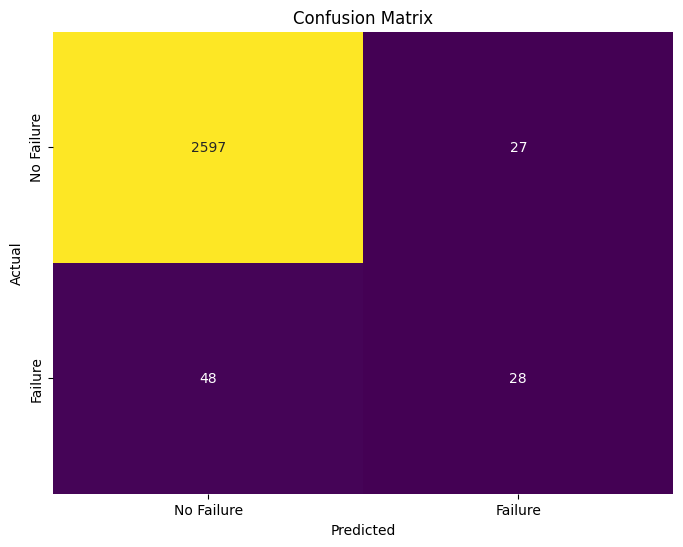

In [1]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_excel('data.xlsx', sheet_name='Sheet1')

# 数据清洗
data.drop_duplicates(inplace=True)
X = data.drop(columns=['机器编号', '是否发生故障', '具体故障类别'])
y = data['是否发生故障']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建并训练模型
ada_model = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
ada_model.fit(X_train, y_train)

# 预测
y_pred = ada_model.predict(X_test)
y_pred_proba = ada_model.predict_proba(X_test)[:, 1]  # 获取正类的概率

# 评估模型
print(classification_report(y_test, y_pred))

# 绘制混淆矩阵
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", cbar=False,
            xticklabels=['No Failure', 'Failure'],
            yticklabels=['No Failure', 'Failure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


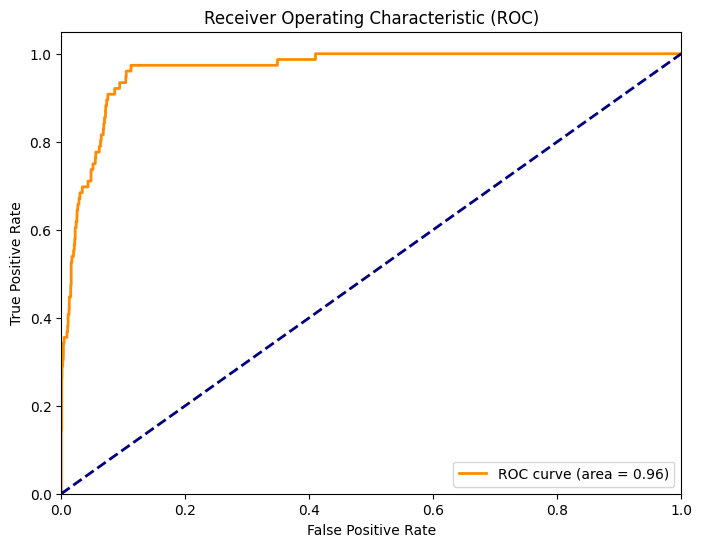

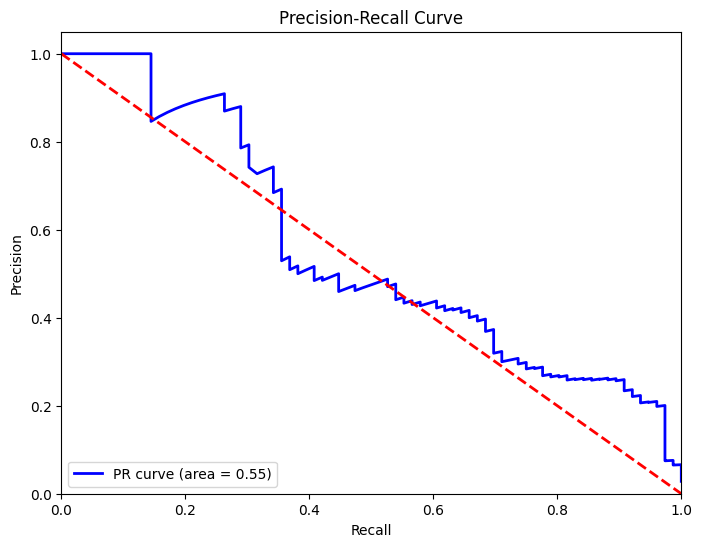

In [2]:
# 计算ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# 计算PR曲线
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

# 绘制PR曲线
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.plot([0, 1], [1, 0], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()